In [1]:
import numpy as np
import pandas as pd   # ← typo here: should be 'import'
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/sierraleone-bumbuna.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
null_percentage = df.isna().mean() * 100  
columns_with_high_nulls = null_percentage[null_percentage > 5]
print(columns_with_high_nulls)

Comments    100.0
dtype: float64


In [4]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)  # Compute Z-scores

# Flag rows where any |Z| > 3 (considered outliers)
outlier_flags = (z_scores.abs() > 3)
df['is_outlier'] = outlier_flags.any(axis=1)  # Mark True if any column exceeds Z=3

print(f"Total outliers detected: {df['is_outlier'].sum()}")

Total outliers detected: 16292


In [8]:
print(f"Total outliers detected: {df['is_outlier'].sum()}")

Total outliers detected: 16292


In [9]:
df[df['is_outlier']].head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,is_outlier
653,2021-10-30 10:54,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6,NaN,True
654,2021-10-30 10:55,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6,NaN,True
655,2021-10-30 10:56,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0,NaN,True
656,2021-10-30 10:57,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7,NaN,True
657,2021-10-30 10:58,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6,NaN,True


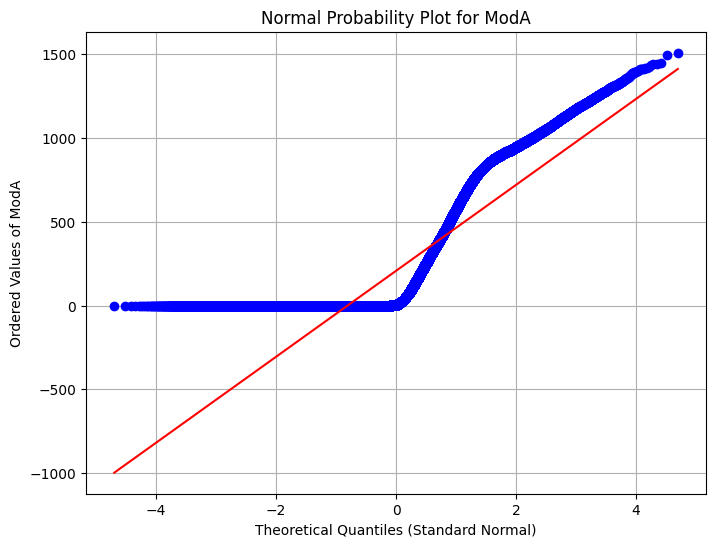

In [11]:
import scipy.stats as stats

# Normal Probability Plot for 'ModA'
plt.figure(figsize=(8, 6))
stats.probplot(df['ModA'], plot=plt)
plt.title('Normal Probability Plot for ModA')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Ordered Values of ModA')
plt.grid(True)
plt.show()

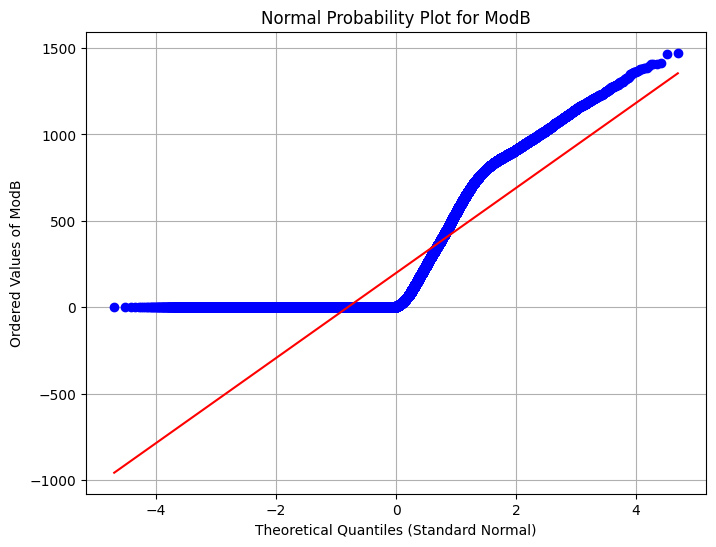

In [12]:
# Normal Probability Plot for 'ModB'
plt.figure(figsize=(8, 6))
stats.probplot(df['ModB'], plot=plt)
plt.title('Normal Probability Plot for ModB')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Ordered Values of ModB')
plt.grid(True)
plt.show()

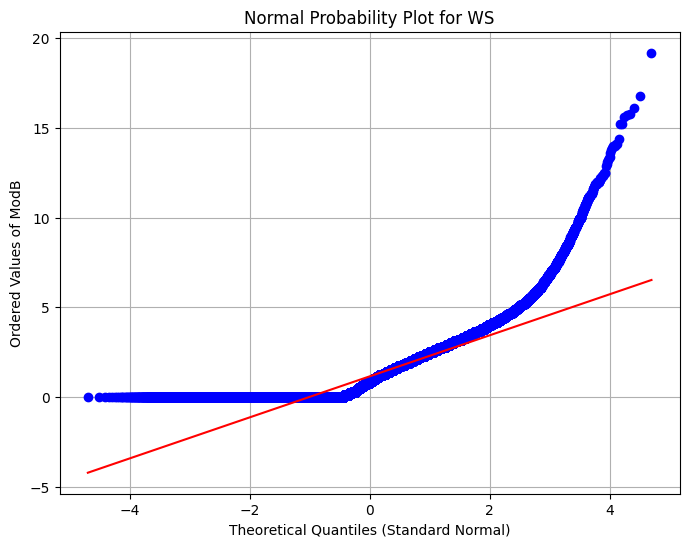

In [14]:
# Normal Probability Plot for 'ModB'
plt.figure(figsize=(8, 6))
stats.probplot(df['WS'], plot=plt)
plt.title('Normal Probability Plot for WS')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Ordered Values of ModB')
plt.grid(True)
plt.show()

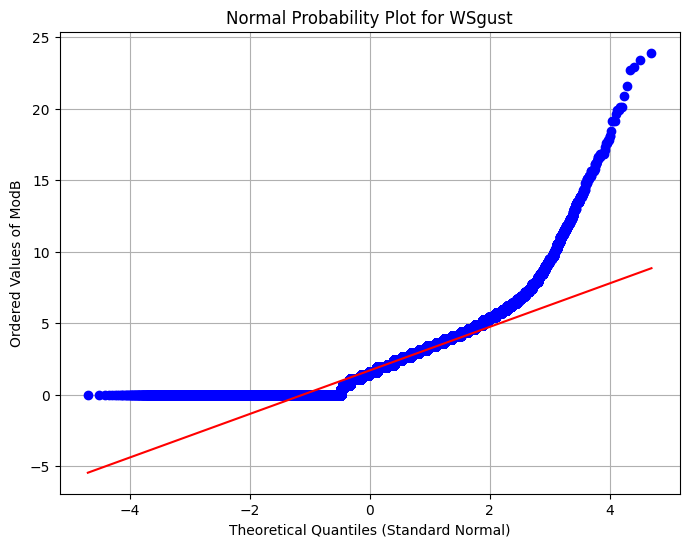

In [15]:
# Normal Probability Plot for 'ModB'
plt.figure(figsize=(8, 6))
stats.probplot(df['WSgust'], plot=plt)
plt.title('Normal Probability Plot for WSgust')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Ordered Values of ModB')
plt.grid(True)
plt.show()

In [ ]:
for col in cols_to_check:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())
df_cleaned_seralleone = df[~df['is_outlier']].drop(columns='is_outlier')

In [ ]:
import os
country = 'serraleone'
os.makedirs('data', exist_ok=True)
df_cleaned_seralleone.to_csv(f'data/{country}_clean.csv', index=False)

print(f"Cleaned data exported to data/{country}_clean.csv")

Cleaned data exported to data/serraleone_clean.csv


In [ ]:
df = pd.read_csv('data/serraleone_clean.csv', parse_dates=['Timestamp'])

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

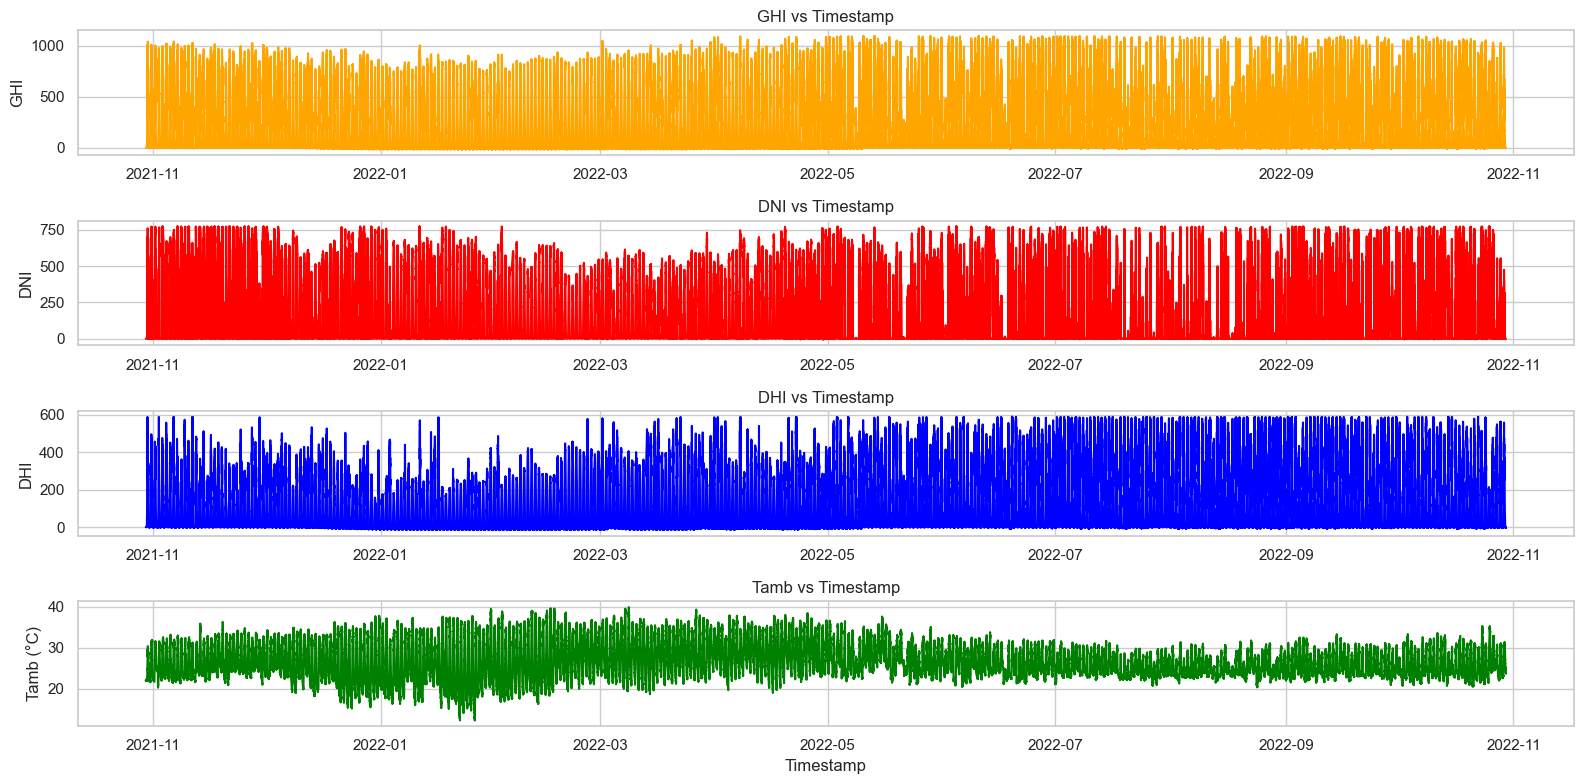

In [24]:
sns.set(style='whitegrid')

# Plot GHI, DNI, DHI, Tamb vs Timestamp
plt.figure(figsize=(16, 8))

# GHI
plt.subplot(4, 1, 1)
sns.lineplot(x='Timestamp', y='GHI', data=df, color='orange')
plt.title('GHI vs Timestamp')
plt.xlabel('')
plt.ylabel('GHI')

# DNI
plt.subplot(4, 1, 2)
sns.lineplot(x='Timestamp', y='DNI', data=df, color='red')
plt.title('DNI vs Timestamp')
plt.xlabel('')
plt.ylabel('DNI')

# DHI
plt.subplot(4, 1, 3)
sns.lineplot(x='Timestamp', y='DHI', data=df, color='blue')
plt.title('DHI vs Timestamp')
plt.xlabel('')
plt.ylabel('DHI')

# Tamb
plt.subplot(4, 1, 4)
sns.lineplot(x='Timestamp', y='Tamb', data=df, color='green')
plt.title('Tamb vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()

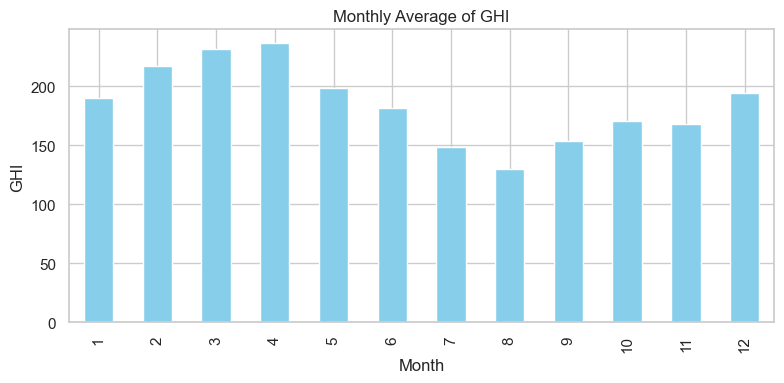

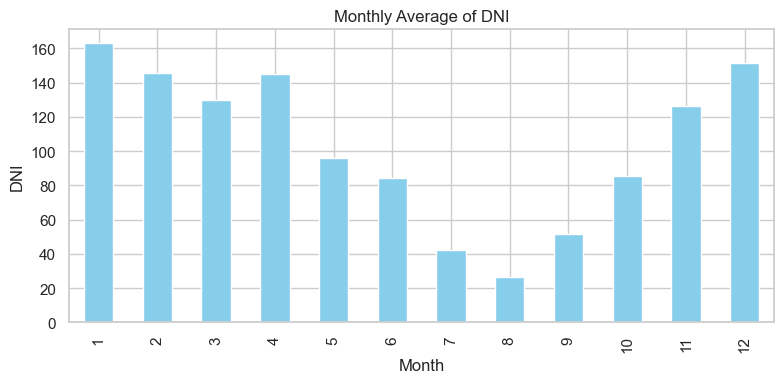

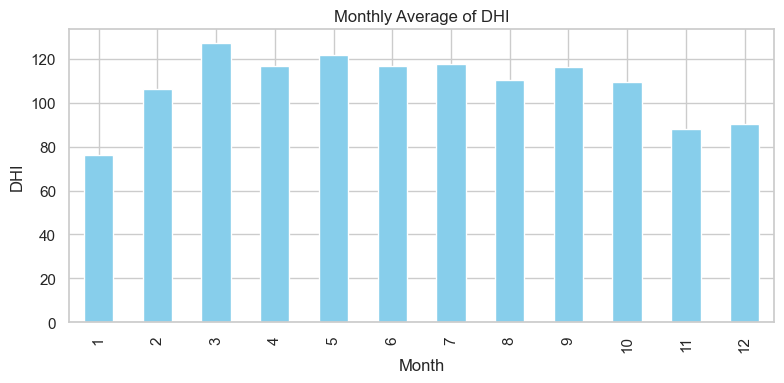

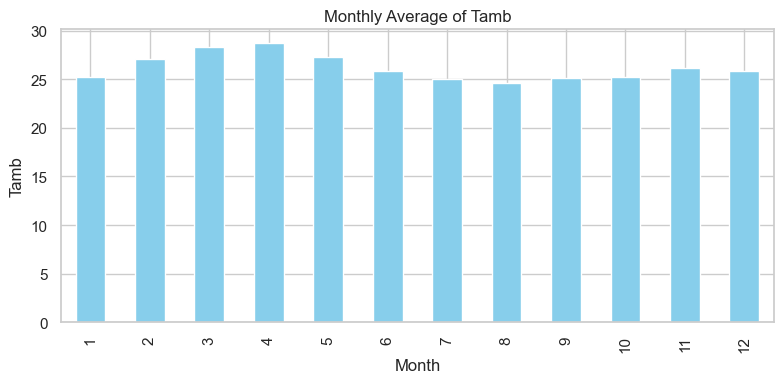

In [25]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure(figsize=(8,4))
    monthly_avg[col].plot(kind='bar', color='skyblue')
    plt.title(f'Monthly Average of {col}')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

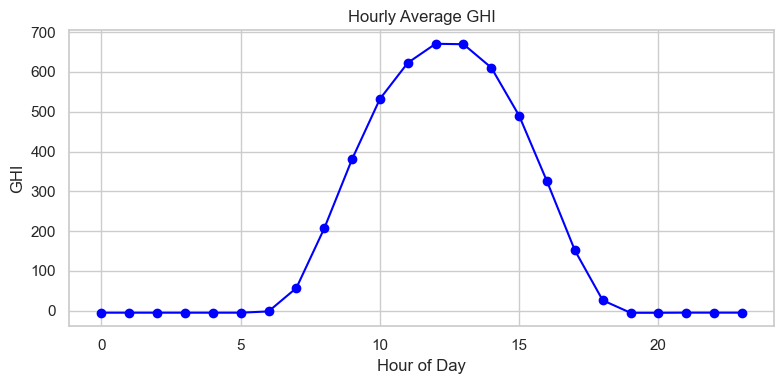

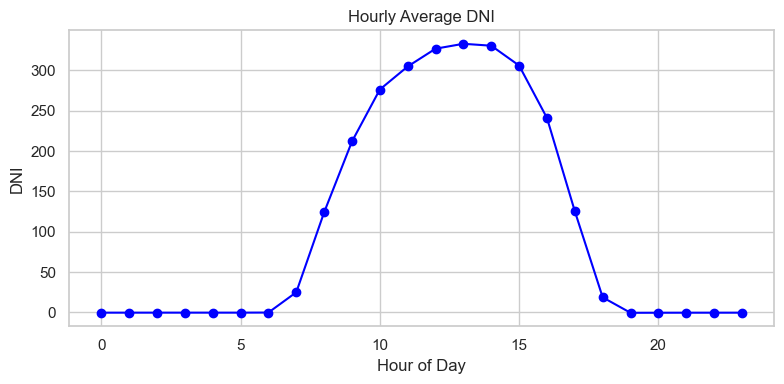

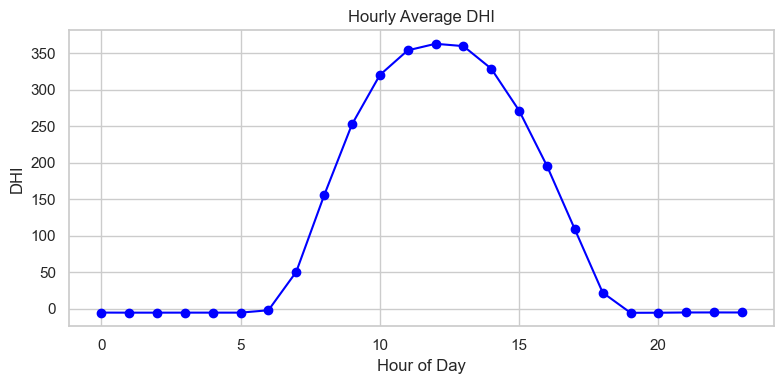

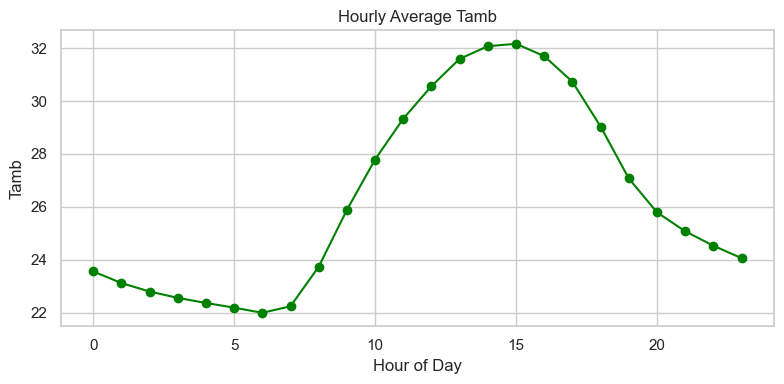

In [26]:
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure(figsize=(8,4))
    plt.plot(hourly_avg.index, hourly_avg[col], marker='o', color='green' if col=='Tamb' else 'blue')
    plt.title(f'Hourly Average {col}')
    plt.xlabel('Hour of Day')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### ☀️ GHI (Global Horizontal Irradiance)

- **Expected shape**: A bell curve peaking around solar noon (typically ~12–14h).
- **Night hours**: Zero or near-zero values before ~6 am and after ~6–7 pm.
- **Symmetry**: Somewhat symmetric unless affected by atmospheric haze, cloud cover patterns, or terrain shading in mornings vs. afternoons.

---

### ☀️ DNI (Direct Normal Irradiance)

- **Sharper peak** than GHI, often narrower.
- **Cloud sensitivity**: Sharper rise and fall due to direct beam blockage.
- **Midday variance**: Possibly higher due to intermittent shading.

---

### ☁️ DHI (Diffuse Horizontal Irradiance)

- **Flatter curve** spread throughout daylight hours.
- **Earlier rise & extended duration** compared to DNI, especially on cloudy or hazy days.
- **Peak timing**: Can occur before or after noon depending on sky conditions.

---

### 🌡️ Tamb (Ambient Temperature)

- **Morning**: Starts low in early hours.
- **Afternoon peak**: Gradually rises to peak in early to mid-afternoon (~14–16h), **after** solar radiation peaks.
- **Plateau effect**: Possible in areas with thermal inertia or strong afternoon winds.




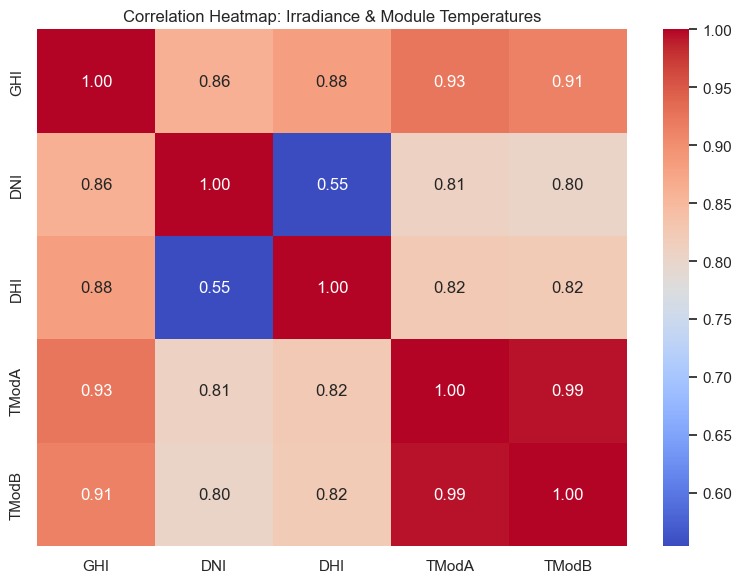

In [27]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Irradiance & Module Temperatures')
plt.tight_layout()
plt.show()

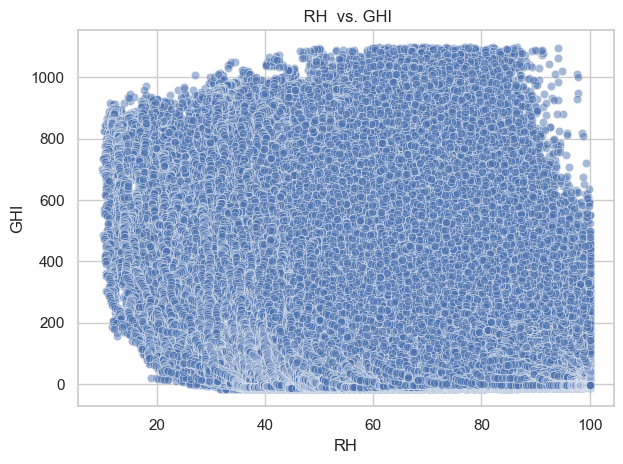

In [28]:
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.5)
plt.title(' RH  vs. GHI')  # Corrected this line
plt.xlabel('RH')
plt.ylabel('GHI')
plt.grid(True)
plt.tight_layout()
plt.show()

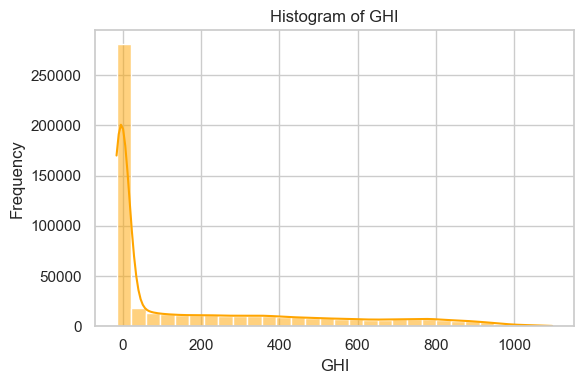

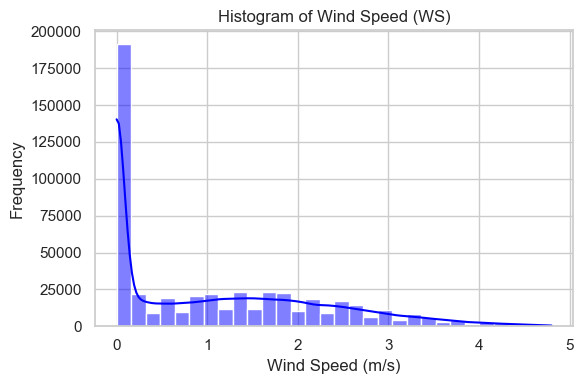

In [29]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df['GHI'], bins=30, kde=True, color='orange')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
sns.histplot(df['WS'], bins=30, kde=True, color='blue')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

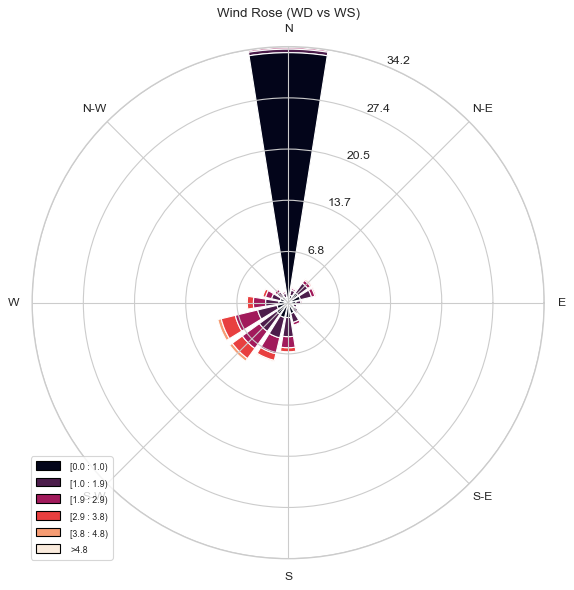

In [30]:
from windrose import WindroseAxes

# Create windrose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose (WD vs WS)')
ax.set_legend()
plt.show()

In [31]:
print("Correlation between RH and Tamb:", df['RH'].corr(df['Tamb']))
print("Correlation between RH and GHI:", df['RH'].corr(df['GHI']))

Correlation between RH and Tamb: -0.7906511045416611
Correlation between RH and GHI: -0.5699562174955888


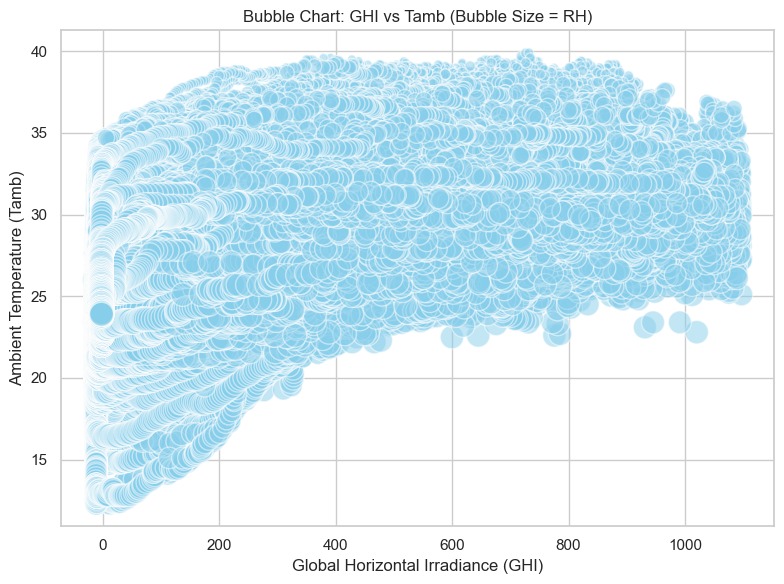

In [32]:
sizes = df['RH'] / df['RH'].max() * 300

plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=sizes, alpha=0.5, c='skyblue', edgecolors='w')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Month,Hour
count,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,0.0,509308.000000,509308.000000
mean,185.000024,104.128943,108.104278,189.764194,181.693908,26.214248,79.747674,1.089871,1.614397,0.352298,130.947234,6.962560,999.873395,0.000997,0.004159,31.959657,32.087075,NaN,6.481746,11.449551
std,279.019460,200.954182,153.691835,281.888942,269.988109,4.397260,20.556188,1.155220,1.503353,0.283730,114.365092,7.455692,2.106966,0.031566,0.040205,12.029241,11.666626,NaN,3.457721,7.001475
min,-15.900000,-7.800000,-16.700000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN,1.000000,0.000000
25%,-3.300000,-0.300000,-4.100000,0.000000,0.000000,23.100000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.400000,23.700000,NaN,3.000000,5.000000
50%,-0.400000,-0.100000,-0.600000,1.200000,1.100000,25.100000,86.100000,0.800000,1.400000,0.400000,156.200000,5.800000,1000.000000,0.000000,0.000000,26.300000,26.500000,NaN,6.000000,11.000000
75%,331.300000,74.800000,217.900000,327.200000,314.500000,29.200000,97.000000,1.900000,2.600000,0.500000,232.800000,11.800000,1001.000000,0.000000,0.000000,39.600000,40.000000,NaN,9.000000,18.000000
max,1097.000000,772.300000,590.500000,1105.000000,1064.000000,39.900000,100.000000,4.800000,6.400000,2.500000,360.000000,98.400000,1006.000000,1.000000,2.000000,71.200000,70.000000,NaN,12.000000,23.000000
